In [1]:
# import all required functions
import os
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_vec_env
import concurrent.futures
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set up path to store the logs:

log_path = os.path.join('Training','Logs')


## Set up a function that takes in learning rate, timesteps, epochs and mini batch size as the input

In [3]:
def HumanoidStandup(timestep,bsize,epoch,LR):
    rewardArray = []
    env = gym.make('HumanoidStandup-v2')
    env = DummyVecEnv([lambda:env])
    model = PPO('MlpPolicy',env,learning_rate=LR,batch_size=bsize,n_epochs=epoch,gamma=0.99,ent_coef=3.62109e-06,clip_range=0.3,max_grad_norm=0.7,vf_coef=0.430793,verbose=1,gae_lambda=0.9,tensorboard_log=log_path)
    model.learn(total_timesteps=timestep)
    ts = timestep/1e6 # In the millions

    # Saves the model 
    PPO_Path = os.path.join('Training','Saved Models','PPOHumanStand{}{}{}{}'.format(ts,LR,bsize,epoch))
    model.save(PPO_Path)

    #Evaluate the model and get average reward for 10 episodes:

    #Run the model in the environment and get rewards
    env = gym.make('HumanoidStandup-v2')
    episodes = 5
    for episode in range(1,episodes+1):
        obs = env.reset()
        done = False
        score = 0
        
        while not done:
            #env.render()
            action, _ = model.predict(obs) # By doing this, rather than taking a random action, the model is used to take actions
            obs, reward, done, info = env.step(action)
            score += reward
            rewardArray.append(score)
        #print('Episode:{} Score:{}'.format(episode, score))
    meanReward = sum(rewardArray)/len(rewardArray)
    return meanReward



## Timesteps = 2000

We will keep the timesteps fixed at 2000 to reduce the time taken to train and execute.
We will look at the average score for 5 different episodes of the env run with the model to evaluate the performance 

### First set up all required variables

In [4]:
# Fixed timesteps:
timestep = 2000
# Choose a large number of learning rates
LR = np.array([0.0030,0.1027,0.2024,0.3021,0.4018,0.5015,0.6012,0.7009,0.8006,0.9003,1.0000])
# Epochs:
epoch = np.array([11,15,20])
# Minibatch size:
# Keep low for quicker execution
bsize = np.array([32,64])

# Now set up a for loop to run for different combinations:
# First set up two different rewards arrays, one for minibatch size of 32 and the other for 64
reward32 = np.zeros([len(LR),len(epoch)])
reward64 = np.zeros([len(LR),len(epoch)])




### Now execute the function

In [ ]:
for i in range(len(LR)):
    for j in range(len(epoch)):
        reward32[i,j] = HumanoidStandup(timestep,32,epoch[j],LR[i])
        reward64[i,j] = HumanoidStandup(timestep,64,epoch[j],LR[i])

print("The rewards for the models with minibatch size set to 32 are: ")
print(reward32)
print("The rewards for the models with minibatch size set to 64 are: ")
print(reward64)

### Plot the rewards against the learning rate to find the optimal learning rate

#### Batch size of 32

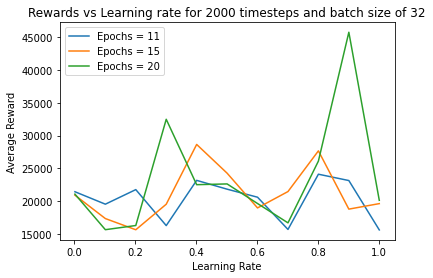

In [16]:
plt.plot(LR,reward32[:,0],label='Epochs = 11')
plt.plot(LR,reward32[:,1],label='Epochs = 15')
plt.plot(LR,reward32[:,2],label='Epochs = 20')
plt.xlabel("Learning Rate")
plt.ylabel("Average Reward")
plt.title("Rewards vs Learning rate for 2000 timesteps and batch size of 32")
plt.legend()
plt.show()

#### Batch size of 64

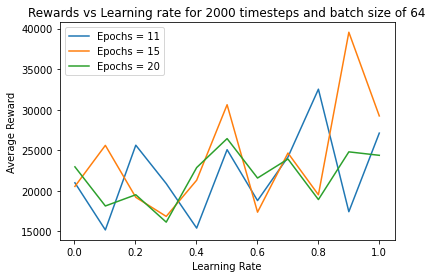

In [17]:
plt.plot(LR,reward64[:,0],label='Epochs = 11')
plt.plot(LR,reward64[:,1],label='Epochs = 15')
plt.plot(LR,reward64[:,2],label='Epochs = 20')
plt.xlabel("Learning Rate")
plt.ylabel("Average Reward")
plt.title("Rewards vs Learning rate for 2000 timesteps and batch size of 64")
plt.legend()
plt.show()

## Timesteps = 5000

### Set up all required variables

In [5]:
# Fixed timesteps:
timestep = 5000
# Choose a large number of learning rates
LR = np.array([0.0030,0.1027,0.2024,0.3021,0.4018,0.5015,0.6012,0.7009,0.8006,0.9003,1.0000])
# Epochs:
epoch = np.array([11,15,20])
# Minibatch size:
# Keep low for quicker execution
bsize = np.array([32,64])

# Now set up a for loop to run for different combinations:
# First set up two different rewards arrays, one for minibatch size of 32 and the other for 64
reward32 = np.zeros([len(LR),len(epoch)])
reward64 = np.zeros([len(LR),len(epoch)])

### Run the function

In [6]:
for i in range(len(LR)):
    for j in range(len(epoch)):
        reward32[i,j] = HumanoidStandup(timestep,32,epoch[j],LR[i])
        reward64[i,j] = HumanoidStandup(timestep,64,epoch[j],LR[i])


Using cpu device
Logging to Training/Logs/PPO_137
-----------------------------
| time/              |      |
|    fps             | 925  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 659        |
|    iterations           | 2          |
|    time_elapsed         | 6          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.45062298 |
|    clip_fraction        | 0.641      |
|    clip_range           | 0.3        |
|    entropy_loss         | -24.2      |
|    explained_variance   | -0.000793  |
|    learning_rate        | 0.003      |
|    loss                 | 1.54e+04   |
|    n_updates            | 11         |
|    policy_gradient_loss | -0.0497    |
|    std                  | 1          |
|    value_loss           | 7.01e+04   |
--

### Plot the rewards

#### Batch size of 32

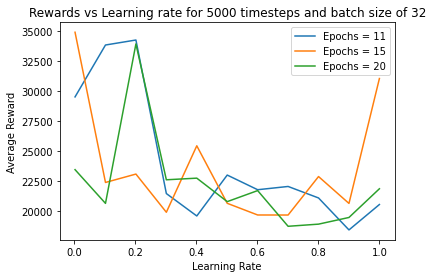

In [14]:
plt.plot(LR,reward32[:,0],label='Epochs = 11')
plt.plot(LR,reward32[:,1],label='Epochs = 15')
plt.plot(LR,reward32[:,2],label='Epochs = 20')
plt.xlabel("Learning Rate")
plt.ylabel("Average Reward")
plt.title("Rewards vs Learning rate for 5000 timesteps and batch size of 32")
plt.legend()
plt.show()

#### Batch size of 64

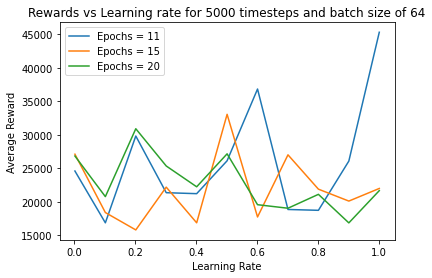

In [15]:
plt.plot(LR,reward64[:,0],label='Epochs = 11')
plt.plot(LR,reward64[:,1],label='Epochs = 15')
plt.plot(LR,reward64[:,2],label='Epochs = 20')
plt.xlabel("Learning Rate")
plt.ylabel("Average Reward")
plt.title("Rewards vs Learning rate for 5000 timesteps and batch size of 64")
plt.legend()
plt.show()

## Timesteps = 10000

### Set up all required variables

In [9]:
# Fixed timesteps:
timestep = 10000
# Choose a large number of learning rates
LR = np.array([0.0030,0.1027,0.2024,0.3021,0.4018,0.5015,0.6012,0.7009,0.8006,0.9003,1.0000])
# Epochs:
epoch = np.array([11,15,20])
# Minibatch size:
# Keep low for quicker execution
bsize = np.array([32,64])

# Now set up a for loop to run for different combinations:
# First set up two different rewards arrays, one for minibatch size of 32 and the other for 64
reward32 = np.zeros([len(LR),len(epoch)])
reward64 = np.zeros([len(LR),len(epoch)])

### Run the function

In [10]:
for i in range(len(LR)):
    for j in range(len(epoch)):
        reward32[i,j] = HumanoidStandup(timestep,32,epoch[j],LR[i])
        reward64[i,j] = HumanoidStandup(timestep,64,epoch[j],LR[i])

Using cpu device
Logging to Training/Logs/PPO_203
-----------------------------
| time/              |      |
|    fps             | 961  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 677        |
|    iterations           | 2          |
|    time_elapsed         | 6          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.42881554 |
|    clip_fraction        | 0.644      |
|    clip_range           | 0.3        |
|    entropy_loss         | -24.2      |
|    explained_variance   | -5.26e-05  |
|    learning_rate        | 0.003      |
|    loss                 | 1.73e+04   |
|    n_updates            | 11         |
|    policy_gradient_loss | -0.0392    |
|    std                  | 1.01       |
|    value_loss           | 7.71e+04   |
--

### Plot the rewards

#### Batch size of 32

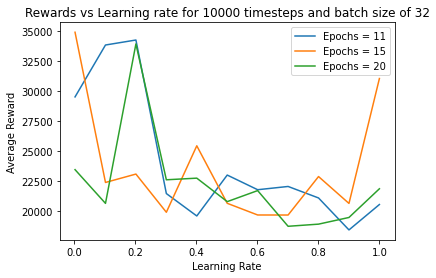

In [12]:
plt.plot(LR,reward32[:,0],label='Epochs = 11')
plt.plot(LR,reward32[:,1],label='Epochs = 15')
plt.plot(LR,reward32[:,2],label='Epochs = 20')
plt.xlabel("Learning Rate")
plt.ylabel("Average Reward")
plt.title("Rewards vs Learning rate for 10000 timesteps and batch size of 32")
plt.legend()
plt.show()

#### Batch size of 64

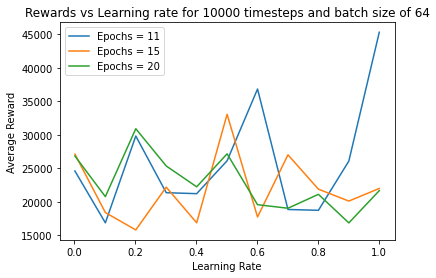

In [13]:
plt.plot(LR,reward64[:,0],label='Epochs = 11')
plt.plot(LR,reward64[:,1],label='Epochs = 15')
plt.plot(LR,reward64[:,2],label='Epochs = 20')
plt.xlabel("Learning Rate")
plt.ylabel("Average Reward")
plt.title("Rewards vs Learning rate for 10000 timesteps and batch size of 64")
plt.legend()
plt.show()

## Timesteps = 25000

### Set up variables

In [4]:
# Fixed timesteps:
timestep = 25000
# Choose a large number of learning rates
LR = np.array([0.0030, 0.0057, 0.0084, 0.0111, 0.0138, 0.0165, 0.0192, 0.0219, 0.0246, 0.0273, 0.0300])
# Epochs:
epoch = np.array([11,15,20])
# Minibatch size:
# Keep low for quicker execution
bsize = np.array([32,64])

# Now set up a for loop to run for different combinations:
# First set up two different rewards arrays, one for minibatch size of 32 and the other for 64
reward32 = np.zeros([len(LR),len(epoch)])
reward64 = np.zeros([len(LR),len(epoch)])

### Run the function

In [5]:
for i in range(len(LR)):
    for j in range(len(epoch)):
        reward32[i,j] = HumanoidStandup(timestep,32,epoch[j],LR[i])
        reward64[i,j] = HumanoidStandup(timestep,64,epoch[j],LR[i])

Using cpu device
Logging to Training/Logs/PPO_303
-----------------------------
| time/              |      |
|    fps             | 813  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 560       |
|    iterations           | 2         |
|    time_elapsed         | 7         |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.3815008 |
|    clip_fraction        | 0.626     |
|    clip_range           | 0.3       |
|    entropy_loss         | -24.2     |
|    explained_variance   | -0.000221 |
|    learning_rate        | 0.003     |
|    loss                 | 2.27e+04  |
|    n_updates            | 11        |
|    policy_gradient_loss | -0.0632   |
|    std                  | 0.998     |
|    value_loss           | 1.06e+05  |
--------------------

### Plot

#### Batch size of 32

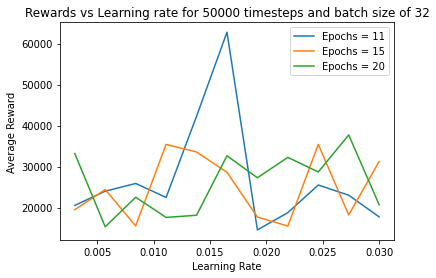

In [6]:
plt.plot(LR,reward32[:,0],label='Epochs = 11')
plt.plot(LR,reward32[:,1],label='Epochs = 15')
plt.plot(LR,reward32[:,2],label='Epochs = 20')
plt.xlabel("Learning Rate")
plt.ylabel("Average Reward")
plt.title("Rewards vs Learning rate for 50000 timesteps and batch size of 32")
plt.legend()
plt.show()

#### Batch size of 64

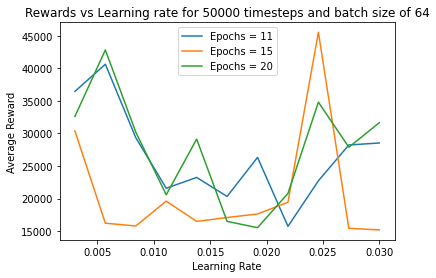

In [7]:
plt.plot(LR,reward64[:,0],label='Epochs = 11')
plt.plot(LR,reward64[:,1],label='Epochs = 15')
plt.plot(LR,reward64[:,2],label='Epochs = 20')
plt.xlabel("Learning Rate")
plt.ylabel("Average Reward")
plt.title("Rewards vs Learning rate for 50000 timesteps and batch size of 64")
plt.legend()
plt.show()

## Timesteps = 1 Mil

### Set up Variables

In [ ]:
# Fixed timesteps:
timestep = 1e6
# Choose a large number of learning rates
LR = np.array([0.0030, 0.0057, 0.0138, 0.0192, 0.0300])
# Epochs:
epoch = np.array([11,15,20])
# Minibatch size:
# Keep low for quicker execution
bsize = np.array([32,64])

# Now set up a for loop to run for different combinations:
# First set up two different rewards arrays, one for minibatch size of 32 and the other for 64
reward32 = np.zeros([len(LR),len(epoch)])
reward64 = np.zeros([len(LR),len(epoch)])

### Run the function

In [ ]:
for i in range(len(LR)):
    for j in range(len(epoch)):
        reward32[i,j] = HumanoidStandup(timestep,32,epoch[j],LR[i])
        reward64[i,j] = HumanoidStandup(timestep,64,epoch[j],LR[i])

### Plot

#### Batch size of 32

In [ ]:
plt.plot(LR,reward32[:,0],label='Epochs = 11')
plt.plot(LR,reward32[:,1],label='Epochs = 15')
plt.plot(LR,reward32[:,2],label='Epochs = 20')
plt.xlabel("Learning Rate")
plt.ylabel("Average Reward")
plt.title("Rewards vs Learning rate for 50000 timesteps and batch size of 32")
plt.legend()
plt.show()

#### Batch size of 64

In [ ]:
plt.plot(LR,reward64[:,0],label='Epochs = 11')
plt.plot(LR,reward64[:,1],label='Epochs = 15')
plt.plot(LR,reward64[:,2],label='Epochs = 20')
plt.xlabel("Learning Rate")
plt.ylabel("Average Reward")
plt.title("Rewards vs Learning rate for 50000 timesteps and batch size of 64")
plt.legend()
plt.show()